In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="RNN seq 128.", name="epoch 1,000")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.SimpleRNN(128, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=1000, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16768     
                                                                 
 dense (Dense)               (None, 25)                3225      
                                                                 
Total params: 19,993
Trainable params: 19,993
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.8038 - mae: 0.7441INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 620ms/step - loss: 0.7618 - mae: 0.7175 - val_loss: 0.3158 - val_mae: 0.4396
Epoch 2/1000
5/5 [==============================] - ETA: 0s - loss: 0.2404 - mae: 0.3854INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 453ms/step - loss: 0.2404 - mae: 0.3854 - val_loss: 0.1414 - val_mae: 0.3072
Epoch 3/1000
5/5 [==============================] - ETA: 0s - loss: 0.1330 - mae: 0.2959INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 495ms/step - loss: 0.1330 - mae: 0.2959 - val_loss: 0.1048 - val_mae: 0.2564
Epoch 4/1000
5/5 [==============================] - ETA: 0s - loss: 0.0990 - mae: 0.2518INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 508ms/step - loss: 0.0990 - mae: 0.2518 - val_loss: 0.0859 - val_mae: 0.2321
Epoch 5/1000
5/5 [==============================] - ETA: 0s - loss: 0.0852 - mae: 0.2305INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 490ms/step - loss: 0.0852 - mae: 0.2305 - val_loss: 0.0698 - val_mae: 0.2105
Epoch 6/1000
5/5 [==============================] - ETA: 0s - loss: 0.0734 - mae: 0.2128INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 481ms/step - loss: 0.0734 - mae: 0.2128 - val_loss: 0.0654 - val_mae: 0.2037
Epoch 7/1000
5/5 [==============================] - ETA: 0s - loss: 0.0682 - mae: 0.2054INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 516ms/step - loss: 0.0682 - mae: 0.2054 - val_loss: 0.0630 - val_mae: 0.1992
Epoch 8/1000
5/5 [==============================] - ETA: 0s - loss: 0.0634 - mae: 0.1977INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 520ms/step - loss: 0.0634 - mae: 0.1977 - val_loss: 0.0601 - val_mae: 0.1909
Epoch 9/1000
5/5 [==============================] - 1s 155ms/step - loss: 0.0626 - mae: 0.1968 - val_loss: 0.0658 - val_mae: 0.1987
Epoch 10/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0621 - mae: 0.1954 - val_loss: 0.0615 - val_mae: 0.1917
Epoch 11/1000
5/5 [==============================] - ETA: 0s - loss: 0.0585 - mae: 0.1874INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 504ms/step - loss: 0.0585 - mae: 0.1874 - val_loss: 0.0565 - val_mae: 0.1831
Epoch 12/1000
5/5 [==============================] - ETA: 0s - loss: 0.0559 - mae: 0.1820INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 521ms/step - loss: 0.0559 - mae: 0.1820 - val_loss: 0.0534 - val_mae: 0.1800
Epoch 13/1000
5/5 [==============================] - 1s 158ms/step - loss: 0.0544 - mae: 0.1800 - val_loss: 0.0587 - val_mae: 0.1922
Epoch 14/1000
5/5 [==============================] - ETA: 0s - loss: 0.0565 - mae: 0.1856INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 479ms/step - loss: 0.0565 - mae: 0.1856 - val_loss: 0.0523 - val_mae: 0.1754
Epoch 15/1000
5/5 [==============================] - 1s 172ms/step - loss: 0.0539 - mae: 0.1808 - val_loss: 0.0613 - val_mae: 0.1921
Epoch 16/1000
5/5 [==============================] - 1s 157ms/step - loss: 0.0555 - mae: 0.1846 - val_loss: 0.0544 - val_mae: 0.1786
Epoch 17/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0539 - mae: 0.1783INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 512ms/step - loss: 0.0533 - mae: 0.1774 - val_loss: 0.0501 - val_mae: 0.1712
Epoch 18/1000
5/5 [==============================] - 1s 173ms/step - loss: 0.0498 - mae: 0.1706 - val_loss: 0.0521 - val_mae: 0.1788
Epoch 19/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0493 - mae: 0.1715INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 484ms/step - loss: 0.0487 - mae: 0.1701 - val_loss: 0.0475 - val_mae: 0.1679
Epoch 20/1000
5/5 [==============================] - ETA: 0s - loss: 0.0459 - mae: 0.1642INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 529ms/step - loss: 0.0459 - mae: 0.1642 - val_loss: 0.0466 - val_mae: 0.1653
Epoch 21/1000
5/5 [==============================] - 1s 164ms/step - loss: 0.0444 - mae: 0.1621 - val_loss: 0.0473 - val_mae: 0.1658
Epoch 22/1000
5/5 [==============================] - ETA: 0s - loss: 0.0437 - mae: 0.1596INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 483ms/step - loss: 0.0437 - mae: 0.1596 - val_loss: 0.0449 - val_mae: 0.1627
Epoch 23/1000
5/5 [==============================] - ETA: 0s - loss: 0.0425 - mae: 0.1580INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 499ms/step - loss: 0.0425 - mae: 0.1580 - val_loss: 0.0426 - val_mae: 0.1591
Epoch 24/1000
5/5 [==============================] - ETA: 0s - loss: 0.0409 - mae: 0.1549INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 499ms/step - loss: 0.0409 - mae: 0.1549 - val_loss: 0.0420 - val_mae: 0.1576
Epoch 25/1000
5/5 [==============================] - ETA: 0s - loss: 0.0399 - mae: 0.1528INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 494ms/step - loss: 0.0399 - mae: 0.1528 - val_loss: 0.0411 - val_mae: 0.1564
Epoch 26/1000
5/5 [==============================] - 1s 175ms/step - loss: 0.0400 - mae: 0.1534 - val_loss: 0.0416 - val_mae: 0.1575
Epoch 27/1000
5/5 [==============================] - ETA: 0s - loss: 0.0382 - mae: 0.1497INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 502ms/step - loss: 0.0382 - mae: 0.1497 - val_loss: 0.0386 - val_mae: 0.1514
Epoch 28/1000
5/5 [==============================] - ETA: 0s - loss: 0.0373 - mae: 0.1489INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 506ms/step - loss: 0.0373 - mae: 0.1489 - val_loss: 0.0380 - val_mae: 0.1501
Epoch 29/1000
5/5 [==============================] - ETA: 0s - loss: 0.0360 - mae: 0.1457INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 473ms/step - loss: 0.0360 - mae: 0.1457 - val_loss: 0.0375 - val_mae: 0.1487
Epoch 30/1000
5/5 [==============================] - ETA: 0s - loss: 0.0359 - mae: 0.1448INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 507ms/step - loss: 0.0359 - mae: 0.1448 - val_loss: 0.0357 - val_mae: 0.1448
Epoch 31/1000
5/5 [==============================] - ETA: 0s - loss: 0.0343 - mae: 0.1423INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 543ms/step - loss: 0.0343 - mae: 0.1423 - val_loss: 0.0348 - val_mae: 0.1432
Epoch 32/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0335 - mae: 0.1402 - val_loss: 0.0372 - val_mae: 0.1488
Epoch 33/1000
5/5 [==============================] - ETA: 0s - loss: 0.0341 - mae: 0.1428INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 492ms/step - loss: 0.0341 - mae: 0.1428 - val_loss: 0.0331 - val_mae: 0.1393
Epoch 34/1000
5/5 [==============================] - ETA: 0s - loss: 0.0325 - mae: 0.1380INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 525ms/step - loss: 0.0325 - mae: 0.1380 - val_loss: 0.0331 - val_mae: 0.1399
Epoch 35/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0310 - mae: 0.1350INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 469ms/step - loss: 0.0310 - mae: 0.1353 - val_loss: 0.0320 - val_mae: 0.1380
Epoch 36/1000
5/5 [==============================] - 1s 163ms/step - loss: 0.0305 - mae: 0.1334 - val_loss: 0.0320 - val_mae: 0.1382
Epoch 37/1000
5/5 [==============================] - ETA: 0s - loss: 0.0304 - mae: 0.1340INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 502ms/step - loss: 0.0304 - mae: 0.1340 - val_loss: 0.0301 - val_mae: 0.1327
Epoch 38/1000
5/5 [==============================] - ETA: 0s - loss: 0.0287 - mae: 0.1305INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 0.0287 - mae: 0.1305 - val_loss: 0.0296 - val_mae: 0.1316
Epoch 39/1000
5/5 [==============================] - ETA: 0s - loss: 0.0281 - mae: 0.1283INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 489ms/step - loss: 0.0281 - mae: 0.1283 - val_loss: 0.0292 - val_mae: 0.1322
Epoch 40/1000
5/5 [==============================] - ETA: 0s - loss: 0.0275 - mae: 0.1270INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 530ms/step - loss: 0.0275 - mae: 0.1270 - val_loss: 0.0285 - val_mae: 0.1296
Epoch 41/1000
5/5 [==============================] - ETA: 0s - loss: 0.0265 - mae: 0.1252INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 474ms/step - loss: 0.0265 - mae: 0.1252 - val_loss: 0.0275 - val_mae: 0.1280
Epoch 42/1000
5/5 [==============================] - ETA: 0s - loss: 0.0257 - mae: 0.1237INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 516ms/step - loss: 0.0257 - mae: 0.1237 - val_loss: 0.0269 - val_mae: 0.1262
Epoch 43/1000
5/5 [==============================] - ETA: 0s - loss: 0.0254 - mae: 0.1232INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 480ms/step - loss: 0.0254 - mae: 0.1232 - val_loss: 0.0261 - val_mae: 0.1240
Epoch 44/1000
5/5 [==============================] - ETA: 0s - loss: 0.0244 - mae: 0.1202INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 528ms/step - loss: 0.0244 - mae: 0.1202 - val_loss: 0.0255 - val_mae: 0.1238
Epoch 45/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0237 - mae: 0.1190 - val_loss: 0.0258 - val_mae: 0.1246
Epoch 46/1000
5/5 [==============================] - ETA: 0s - loss: 0.0231 - mae: 0.1174INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 499ms/step - loss: 0.0231 - mae: 0.1174 - val_loss: 0.0241 - val_mae: 0.1196
Epoch 47/1000
5/5 [==============================] - 1s 165ms/step - loss: 0.0227 - mae: 0.1170 - val_loss: 0.0250 - val_mae: 0.1220
Epoch 48/1000
5/5 [==============================] - ETA: 0s - loss: 0.0221 - mae: 0.1152INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 479ms/step - loss: 0.0221 - mae: 0.1152 - val_loss: 0.0238 - val_mae: 0.1192
Epoch 49/1000
5/5 [==============================] - ETA: 0s - loss: 0.0212 - mae: 0.1134INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 524ms/step - loss: 0.0212 - mae: 0.1134 - val_loss: 0.0226 - val_mae: 0.1171
Epoch 50/1000
5/5 [==============================] - 1s 171ms/step - loss: 0.0200 - mae: 0.1100 - val_loss: 0.0230 - val_mae: 0.1196
Epoch 51/1000
5/5 [==============================] - ETA: 0s - loss: 0.0202 - mae: 0.1109INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 491ms/step - loss: 0.0202 - mae: 0.1109 - val_loss: 0.0215 - val_mae: 0.1143
Epoch 52/1000
5/5 [==============================] - ETA: 0s - loss: 0.0192 - mae: 0.1080INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 0.0192 - mae: 0.1080 - val_loss: 0.0209 - val_mae: 0.1129
Epoch 53/1000
5/5 [==============================] - ETA: 0s - loss: 0.0189 - mae: 0.1073INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 507ms/step - loss: 0.0189 - mae: 0.1073 - val_loss: 0.0206 - val_mae: 0.1113
Epoch 54/1000
5/5 [==============================] - 1s 170ms/step - loss: 0.0181 - mae: 0.1050 - val_loss: 0.0224 - val_mae: 0.1163
Epoch 55/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0195 - mae: 0.1109 - val_loss: 0.0219 - val_mae: 0.1147
Epoch 56/1000
5/5 [==============================] - ETA: 0s - loss: 0.0185 - mae: 0.1063INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 473ms/step - loss: 0.0185 - mae: 0.1063 - val_loss: 0.0188 - val_mae: 0.1071
Epoch 57/1000
5/5 [==============================] - 1s 159ms/step - loss: 0.0171 - mae: 0.1025 - val_loss: 0.0195 - val_mae: 0.1084
Epoch 58/1000
5/5 [==============================] - ETA: 0s - loss: 0.0171 - mae: 0.1030INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 482ms/step - loss: 0.0171 - mae: 0.1030 - val_loss: 0.0180 - val_mae: 0.1044
Epoch 59/1000
5/5 [==============================] - 1s 172ms/step - loss: 0.0162 - mae: 0.0997 - val_loss: 0.0185 - val_mae: 0.1069
Epoch 60/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0158 - mae: 0.0989INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 499ms/step - loss: 0.0161 - mae: 0.0998 - val_loss: 0.0177 - val_mae: 0.1031
Epoch 61/1000
5/5 [==============================] - 1s 156ms/step - loss: 0.0162 - mae: 0.0996 - val_loss: 0.0197 - val_mae: 0.1093
Epoch 62/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.0159 - mae: 0.1003 - val_loss: 0.0188 - val_mae: 0.1087
Epoch 63/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0160 - mae: 0.0999 - val_loss: 0.0186 - val_mae: 0.1055
Epoch 64/1000
5/5 [==============================] - ETA: 0s - loss: 0.0163 - mae: 0.1006INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 477ms/step - loss: 0.0163 - mae: 0.1006 - val_loss: 0.0171 - val_mae: 0.1023
Epoch 65/1000
5/5 [==============================] - ETA: 0s - loss: 0.0149 - mae: 0.0962INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 514ms/step - loss: 0.0149 - mae: 0.0962 - val_loss: 0.0164 - val_mae: 0.0999
Epoch 66/1000
5/5 [==============================] - ETA: 0s - loss: 0.0146 - mae: 0.0951INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 524ms/step - loss: 0.0146 - mae: 0.0951 - val_loss: 0.0156 - val_mae: 0.0971
Epoch 67/1000
5/5 [==============================] - 1s 157ms/step - loss: 0.0144 - mae: 0.0942 - val_loss: 0.0165 - val_mae: 0.1004
Epoch 68/1000
5/5 [==============================] - 1s 145ms/step - loss: 0.0145 - mae: 0.0950 - val_loss: 0.0161 - val_mae: 0.0988
Epoch 69/1000
5/5 [==============================] - 1s 136ms/step - loss: 0.0139 - mae: 0.0927 - val_loss: 0.0175 - val_mae: 0.1046
Epoch 70/1000
5/5 [==============================] - 1s 138ms/step - loss: 0.0143 - mae: 0.0950 - val_loss: 0.0169 - val_mae: 0.1014
Epoch 71/1000
5/5 [==============================] - 1s 141ms/step - loss: 0.0143 - mae: 0.0947 - val_loss: 0.0216 - val_mae: 0.1158
Epoch 72/1000
5/5 [==============================] - 1s 141ms/step - loss: 0.0167 - mae: 0.1027 - val_loss: 0.0227 - val_mae: 0.1187
Epoch 73/1000
5/5 [==============================] - 1s 144ms/step - loss: 0.0191 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 473ms/step - loss: 0.0141 - mae: 0.0934 - val_loss: 0.0139 - val_mae: 0.0918
Epoch 77/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0133 - mae: 0.0907 - val_loss: 0.0168 - val_mae: 0.1013
Epoch 78/1000
5/5 [==============================] - 1s 155ms/step - loss: 0.0134 - mae: 0.0914 - val_loss: 0.0140 - val_mae: 0.0918
Epoch 79/1000
5/5 [==============================] - ETA: 0s - loss: 0.0125 - mae: 0.0871INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 541ms/step - loss: 0.0125 - mae: 0.0871 - val_loss: 0.0132 - val_mae: 0.0889
Epoch 80/1000
5/5 [==============================] - ETA: 0s - loss: 0.0113 - mae: 0.0839INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 487ms/step - loss: 0.0113 - mae: 0.0839 - val_loss: 0.0131 - val_mae: 0.0893
Epoch 81/1000
5/5 [==============================] - ETA: 0s - loss: 0.0112 - mae: 0.0831INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 514ms/step - loss: 0.0112 - mae: 0.0831 - val_loss: 0.0129 - val_mae: 0.0884
Epoch 82/1000
5/5 [==============================] - 1s 172ms/step - loss: 0.0110 - mae: 0.0827 - val_loss: 0.0129 - val_mae: 0.0881
Epoch 83/1000
5/5 [==============================] - ETA: 0s - loss: 0.0108 - mae: 0.0817INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 482ms/step - loss: 0.0108 - mae: 0.0817 - val_loss: 0.0126 - val_mae: 0.0872
Epoch 84/1000
5/5 [==============================] - ETA: 0s - loss: 0.0105 - mae: 0.0808INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 510ms/step - loss: 0.0105 - mae: 0.0808 - val_loss: 0.0125 - val_mae: 0.0869
Epoch 85/1000
5/5 [==============================] - 1s 163ms/step - loss: 0.0105 - mae: 0.0808 - val_loss: 0.0133 - val_mae: 0.0903
Epoch 86/1000
5/5 [==============================] - 1s 140ms/step - loss: 0.0112 - mae: 0.0834 - val_loss: 0.0129 - val_mae: 0.0894
Epoch 87/1000
5/5 [==============================] - ETA: 0s - loss: 0.0107 - mae: 0.0812INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 488ms/step - loss: 0.0107 - mae: 0.0812 - val_loss: 0.0121 - val_mae: 0.0863
Epoch 88/1000
5/5 [==============================] - ETA: 0s - loss: 0.0101 - mae: 0.0788INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 496ms/step - loss: 0.0101 - mae: 0.0788 - val_loss: 0.0114 - val_mae: 0.0837
Epoch 89/1000
5/5 [==============================] - ETA: 0s - loss: 0.0099 - mae: 0.0782INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 485ms/step - loss: 0.0099 - mae: 0.0782 - val_loss: 0.0112 - val_mae: 0.0824
Epoch 90/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.0096 - mae: 0.0772 - val_loss: 0.0128 - val_mae: 0.0890
Epoch 91/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0104 - mae: 0.0808 - val_loss: 0.0135 - val_mae: 0.0909
Epoch 92/1000
5/5 [==============================] - 1s 145ms/step - loss: 0.0110 - mae: 0.0820 - val_loss: 0.0116 - val_mae: 0.0841
Epoch 93/1000
5/5 [==============================] - ETA: 0s - loss: 0.0103 - mae: 0.0796INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 503ms/step - loss: 0.0103 - mae: 0.0796 - val_loss: 0.0107 - val_mae: 0.0808
Epoch 94/1000
5/5 [==============================] - 1s 169ms/step - loss: 0.0096 - mae: 0.0766 - val_loss: 0.0110 - val_mae: 0.0826
Epoch 95/1000
5/5 [==============================] - ETA: 0s - loss: 0.0093 - mae: 0.0760INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 490ms/step - loss: 0.0093 - mae: 0.0760 - val_loss: 0.0106 - val_mae: 0.0808
Epoch 96/1000
5/5 [==============================] - 1s 163ms/step - loss: 0.0088 - mae: 0.0740 - val_loss: 0.0107 - val_mae: 0.0803
Epoch 97/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0093 - mae: 0.0751 - val_loss: 0.0111 - val_mae: 0.0828
Epoch 98/1000
5/5 [==============================] - 1s 139ms/step - loss: 0.0100 - mae: 0.0791 - val_loss: 0.0110 - val_mae: 0.0819
Epoch 99/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0092 - mae: 0.0754INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 462ms/step - loss: 0.0090 - mae: 0.0745 - val_loss: 0.0103 - val_mae: 0.0790
Epoch 100/1000
5/5 [==============================] - ETA: 0s - loss: 0.0085 - mae: 0.0726INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 528ms/step - loss: 0.0085 - mae: 0.0726 - val_loss: 0.0101 - val_mae: 0.0790
Epoch 101/1000
5/5 [==============================] - ETA: 0s - loss: 0.0085 - mae: 0.0729INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 512ms/step - loss: 0.0085 - mae: 0.0729 - val_loss: 0.0098 - val_mae: 0.0774
Epoch 102/1000
5/5 [==============================] - ETA: 0s - loss: 0.0082 - mae: 0.0713INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 487ms/step - loss: 0.0082 - mae: 0.0713 - val_loss: 0.0097 - val_mae: 0.0778
Epoch 103/1000
5/5 [==============================] - ETA: 0s - loss: 0.0082 - mae: 0.0710INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 507ms/step - loss: 0.0082 - mae: 0.0710 - val_loss: 0.0096 - val_mae: 0.0772
Epoch 104/1000
5/5 [==============================] - 1s 169ms/step - loss: 0.0082 - mae: 0.0707 - val_loss: 0.0117 - val_mae: 0.0864
Epoch 105/1000
5/5 [==============================] - 1s 156ms/step - loss: 0.0095 - mae: 0.0771 - val_loss: 0.0111 - val_mae: 0.0833
Epoch 106/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0086 - mae: 0.0736 - val_loss: 0.0096 - val_mae: 0.0761
Epoch 107/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0085 - mae: 0.0730 - val_loss: 0.0108 - val_mae: 0.0815
Epoch 108/1000
5/5 [==============================] - ETA: 0s - loss: 0.0088 - mae: 0.0744INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 495ms/step - loss: 0.0088 - mae: 0.0744 - val_loss: 0.0093 - val_mae: 0.0758
Epoch 109/1000
5/5 [==============================] - ETA: 0s - loss: 0.0084 - mae: 0.0722INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 486ms/step - loss: 0.0084 - mae: 0.0722 - val_loss: 0.0091 - val_mae: 0.0752
Epoch 110/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0084 - mae: 0.0720 - val_loss: 0.0104 - val_mae: 0.0807
Epoch 111/1000
5/5 [==============================] - ETA: 0s - loss: 0.0079 - mae: 0.0699INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 506ms/step - loss: 0.0079 - mae: 0.0699 - val_loss: 0.0089 - val_mae: 0.0744
Epoch 112/1000
5/5 [==============================] - 1s 167ms/step - loss: 0.0075 - mae: 0.0679 - val_loss: 0.0100 - val_mae: 0.0796
Epoch 113/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0078 - mae: 0.0700 - val_loss: 0.0100 - val_mae: 0.0789
Epoch 114/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0078 - mae: 0.0697 - val_loss: 0.0093 - val_mae: 0.0770
Epoch 115/1000
5/5 [==============================] - ETA: 0s - loss: 0.0078 - mae: 0.0695INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 477ms/step - loss: 0.0078 - mae: 0.0695 - val_loss: 0.0083 - val_mae: 0.0722
Epoch 116/1000
5/5 [==============================] - ETA: 0s - loss: 0.0071 - mae: 0.0664INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 510ms/step - loss: 0.0071 - mae: 0.0664 - val_loss: 0.0081 - val_mae: 0.0707
Epoch 117/1000
5/5 [==============================] - 1s 144ms/step - loss: 0.0072 - mae: 0.0665 - val_loss: 0.0083 - val_mae: 0.0710
Epoch 118/1000
5/5 [==============================] - 1s 141ms/step - loss: 0.0068 - mae: 0.0645 - val_loss: 0.0085 - val_mae: 0.0722
Epoch 119/1000
5/5 [==============================] - 1s 138ms/step - loss: 0.0073 - mae: 0.0673 - val_loss: 0.0084 - val_mae: 0.0712
Epoch 120/1000
5/5 [==============================] - 1s 139ms/step - loss: 0.0066 - mae: 0.0641 - val_loss: 0.0082 - val_mae: 0.0711
Epoch 121/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0070 - mae: 0.0656 - val_loss: 0.0092 - val_mae: 0.0760
Epoch 122/1000
5/5 [==============================] - 1s 143ms/step - loss: 0.0082 - mae: 0.0724 - val_loss: 0.0094 - val_mae: 0.0773
Epoch 123/1000
5/5 [==============================] - 1s 137ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 494ms/step - loss: 0.0065 - mae: 0.0630 - val_loss: 0.0074 - val_mae: 0.0671
Epoch 126/1000
5/5 [==============================] - ETA: 0s - loss: 0.0064 - mae: 0.0627INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 500ms/step - loss: 0.0064 - mae: 0.0627 - val_loss: 0.0074 - val_mae: 0.0675
Epoch 127/1000
5/5 [==============================] - 1s 166ms/step - loss: 0.0062 - mae: 0.0613 - val_loss: 0.0077 - val_mae: 0.0689
Epoch 128/1000
5/5 [==============================] - 1s 140ms/step - loss: 0.0066 - mae: 0.0634 - val_loss: 0.0088 - val_mae: 0.0739
Epoch 129/1000
5/5 [==============================] - 1s 136ms/step - loss: 0.0067 - mae: 0.0643 - val_loss: 0.0089 - val_mae: 0.0745
Epoch 130/1000
5/5 [==============================] - 1s 135ms/step - loss: 0.0067 - mae: 0.0641 - val_loss: 0.0076 - val_mae: 0.0687
Epoch 131/1000
5/5 [==============================] - 1s 146ms/step - loss: 0.0063 - mae: 0.0621 - val_loss: 0.0076 - val_mae: 0.0684
Epoch 132/1000
5/5 [==============================] - ETA: 0s - loss: 0.0060 - mae: 0.0608INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nx

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 502ms/step - loss: 0.0060 - mae: 0.0608 - val_loss: 0.0073 - val_mae: 0.0674
Epoch 133/1000
5/5 [==============================] - 1s 166ms/step - loss: 0.0058 - mae: 0.0596 - val_loss: 0.0074 - val_mae: 0.0677
Epoch 134/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0058 - mae: 0.0597 - val_loss: 0.0077 - val_mae: 0.0693
Epoch 135/1000
5/5 [==============================] - 1s 144ms/step - loss: 0.0060 - mae: 0.0609 - val_loss: 0.0074 - val_mae: 0.0672
Epoch 136/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0063 - mae: 0.0623INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 462ms/step - loss: 0.0061 - mae: 0.0617 - val_loss: 0.0072 - val_mae: 0.0665
Epoch 137/1000
5/5 [==============================] - ETA: 0s - loss: 0.0058 - mae: 0.0603INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 506ms/step - loss: 0.0058 - mae: 0.0603 - val_loss: 0.0070 - val_mae: 0.0645
Epoch 138/1000
5/5 [==============================] - 1s 146ms/step - loss: 0.0057 - mae: 0.0593 - val_loss: 0.0076 - val_mae: 0.0682
Epoch 139/1000
5/5 [==============================] - ETA: 0s - loss: 0.0059 - mae: 0.0603INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 502ms/step - loss: 0.0059 - mae: 0.0603 - val_loss: 0.0069 - val_mae: 0.0643
Epoch 140/1000
5/5 [==============================] - 1s 174ms/step - loss: 0.0055 - mae: 0.0579 - val_loss: 0.0070 - val_mae: 0.0645
Epoch 141/1000
5/5 [==============================] - ETA: 0s - loss: 0.0054 - mae: 0.0572INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 479ms/step - loss: 0.0054 - mae: 0.0572 - val_loss: 0.0068 - val_mae: 0.0639
Epoch 142/1000
5/5 [==============================] - 1s 159ms/step - loss: 0.0054 - mae: 0.0574 - val_loss: 0.0068 - val_mae: 0.0646
Epoch 143/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0058 - mae: 0.0602 - val_loss: 0.0073 - val_mae: 0.0662
Epoch 144/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0058 - mae: 0.0601 - val_loss: 0.0068 - val_mae: 0.0650
Epoch 145/1000
5/5 [==============================] - 1s 146ms/step - loss: 0.0057 - mae: 0.0597 - val_loss: 0.0072 - val_mae: 0.0653
Epoch 146/1000
5/5 [==============================] - 1s 146ms/step - loss: 0.0058 - mae: 0.0596 - val_loss: 0.0072 - val_mae: 0.0665
Epoch 147/1000
5/5 [==============================] - 1s 141ms/step - loss: 0.0059 - mae: 0.0607 - val_loss: 0.0072 - val_mae: 0.0667
Epoch 148/1000
5/5 [==============================] - ETA: 0s - loss: 0.0051 

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 502ms/step - loss: 0.0051 - mae: 0.0559 - val_loss: 0.0064 - val_mae: 0.0626
Epoch 149/1000
5/5 [==============================] - 1s 158ms/step - loss: 0.0052 - mae: 0.0563 - val_loss: 0.0071 - val_mae: 0.0655
Epoch 150/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0053 - mae: 0.0570 - val_loss: 0.0070 - val_mae: 0.0656
Epoch 151/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0052 - mae: 0.0562 - val_loss: 0.0072 - val_mae: 0.0662
Epoch 152/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0057 - mae: 0.0593 - val_loss: 0.0071 - val_mae: 0.0664
Epoch 153/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0054 - mae: 0.0577 - val_loss: 0.0079 - val_mae: 0.0698
Epoch 154/1000
5/5 [==============================] - ETA: 0s - loss: 0.0058 - mae: 0.0598INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nx

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 475ms/step - loss: 0.0058 - mae: 0.0598 - val_loss: 0.0062 - val_mae: 0.0616
Epoch 155/1000
5/5 [==============================] - ETA: 0s - loss: 0.0052 - mae: 0.0567INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 490ms/step - loss: 0.0052 - mae: 0.0567 - val_loss: 0.0062 - val_mae: 0.0614
Epoch 156/1000
5/5 [==============================] - 1s 162ms/step - loss: 0.0052 - mae: 0.0564 - val_loss: 0.0064 - val_mae: 0.0627
Epoch 157/1000
5/5 [==============================] - 1s 142ms/step - loss: 0.0052 - mae: 0.0560 - val_loss: 0.0065 - val_mae: 0.0636
Epoch 158/1000
5/5 [==============================] - 1s 138ms/step - loss: 0.0049 - mae: 0.0554 - val_loss: 0.0062 - val_mae: 0.0611
Epoch 159/1000
5/5 [==============================] - ETA: 0s - loss: 0.0047 - mae: 0.0533INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 494ms/step - loss: 0.0047 - mae: 0.0533 - val_loss: 0.0059 - val_mae: 0.0602
Epoch 160/1000
5/5 [==============================] - 1s 161ms/step - loss: 0.0046 - mae: 0.0532 - val_loss: 0.0064 - val_mae: 0.0624
Epoch 161/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0050 - mae: 0.0552 - val_loss: 0.0068 - val_mae: 0.0657
Epoch 162/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0051 - mae: 0.0562 - val_loss: 0.0073 - val_mae: 0.0658
Epoch 163/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0054 - mae: 0.0570 - val_loss: 0.0076 - val_mae: 0.0685
Epoch 164/1000
5/5 [==============================] - 1s 144ms/step - loss: 0.0056 - mae: 0.0594 - val_loss: 0.0071 - val_mae: 0.0667
Epoch 165/1000
5/5 [==============================] - 1s 137ms/step - loss: 0.0054 - mae: 0.0574 - val_loss: 0.0071 - val_mae: 0.0652
Epoch 166/1000
5/5 [==============================] - 1s 136ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 475ms/step - loss: 0.0048 - mae: 0.0536 - val_loss: 0.0057 - val_mae: 0.0596
Epoch 178/1000
5/5 [==============================] - 1s 160ms/step - loss: 0.0044 - mae: 0.0519 - val_loss: 0.0059 - val_mae: 0.0597
Epoch 179/1000
5/5 [==============================] - ETA: 0s - loss: 0.0045 - mae: 0.0523INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 500ms/step - loss: 0.0045 - mae: 0.0523 - val_loss: 0.0057 - val_mae: 0.0589
Epoch 180/1000
5/5 [==============================] - ETA: 0s - loss: 0.0046 - mae: 0.0533INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 520ms/step - loss: 0.0046 - mae: 0.0533 - val_loss: 0.0054 - val_mae: 0.0576
Epoch 181/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0045 - mae: 0.0526 - val_loss: 0.0056 - val_mae: 0.0592
Epoch 182/1000
5/5 [==============================] - 1s 136ms/step - loss: 0.0043 - mae: 0.0513 - val_loss: 0.0058 - val_mae: 0.0599
Epoch 183/1000
5/5 [==============================] - 1s 135ms/step - loss: 0.0043 - mae: 0.0513 - val_loss: 0.0061 - val_mae: 0.0614
Epoch 184/1000
5/5 [==============================] - ETA: 0s - loss: 0.0041 - mae: 0.0498INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 475ms/step - loss: 0.0041 - mae: 0.0498 - val_loss: 0.0054 - val_mae: 0.0582
Epoch 185/1000
5/5 [==============================] - 1s 161ms/step - loss: 0.0040 - mae: 0.0496 - val_loss: 0.0059 - val_mae: 0.0609
Epoch 186/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0043 - mae: 0.0516 - val_loss: 0.0057 - val_mae: 0.0590
Epoch 187/1000
5/5 [==============================] - ETA: 0s - loss: 0.0039 - mae: 0.0488INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 500ms/step - loss: 0.0039 - mae: 0.0488 - val_loss: 0.0053 - val_mae: 0.0579
Epoch 188/1000
5/5 [==============================] - ETA: 0s - loss: 0.0038 - mae: 0.0482INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 497ms/step - loss: 0.0038 - mae: 0.0482 - val_loss: 0.0051 - val_mae: 0.0561
Epoch 189/1000
5/5 [==============================] - ETA: 0s - loss: 0.0037 - mae: 0.0473INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 490ms/step - loss: 0.0037 - mae: 0.0473 - val_loss: 0.0051 - val_mae: 0.0557
Epoch 190/1000
5/5 [==============================] - 1s 158ms/step - loss: 0.0037 - mae: 0.0470 - val_loss: 0.0054 - val_mae: 0.0582
Epoch 191/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0039 - mae: 0.0491 - val_loss: 0.0059 - val_mae: 0.0591
Epoch 192/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0042 - mae: 0.0510 - val_loss: 0.0064 - val_mae: 0.0637
Epoch 193/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0042 - mae: 0.0512 - val_loss: 0.0065 - val_mae: 0.0637
Epoch 194/1000
5/5 [==============================] - 1s 136ms/step - loss: 0.0041 - mae: 0.0504 - val_loss: 0.0054 - val_mae: 0.0584
Epoch 195/1000
5/5 [==============================] - ETA: 0s - loss: 0.0038 - mae: 0.0485INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nx

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 504ms/step - loss: 0.0038 - mae: 0.0485 - val_loss: 0.0050 - val_mae: 0.0550
Epoch 196/1000
5/5 [==============================] - 1s 162ms/step - loss: 0.0037 - mae: 0.0478 - val_loss: 0.0054 - val_mae: 0.0572
Epoch 197/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0044 - mae: 0.0518 - val_loss: 0.0056 - val_mae: 0.0597
Epoch 198/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.0039 - mae: 0.0487 - val_loss: 0.0060 - val_mae: 0.0617
Epoch 199/1000
5/5 [==============================] - 1s 159ms/step - loss: 0.0040 - mae: 0.0493 - val_loss: 0.0063 - val_mae: 0.0631
Epoch 200/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0042 - mae: 0.0505 - val_loss: 0.0055 - val_mae: 0.0591
Epoch 201/1000
5/5 [==============================] - 1s 147ms/step - loss: 0.0038 - mae: 0.0485 - val_loss: 0.0052 - val_mae: 0.0562
Epoch 202/1000
5/5 [==============================] - 1s 138ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 475ms/step - loss: 0.0036 - mae: 0.0469 - val_loss: 0.0048 - val_mae: 0.0544
Epoch 204/1000
5/5 [==============================] - 1s 157ms/step - loss: 0.0036 - mae: 0.0469 - val_loss: 0.0052 - val_mae: 0.0569
Epoch 205/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0042 - mae: 0.0510 - val_loss: 0.0064 - val_mae: 0.0637
Epoch 206/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0042 - mae: 0.0512 - val_loss: 0.0054 - val_mae: 0.0571
Epoch 207/1000
5/5 [==============================] - 1s 144ms/step - loss: 0.0040 - mae: 0.0497 - val_loss: 0.0057 - val_mae: 0.0596
Epoch 208/1000
5/5 [==============================] - 1s 137ms/step - loss: 0.0045 - mae: 0.0529 - val_loss: 0.0053 - val_mae: 0.0573
Epoch 209/1000
5/5 [==============================] - 1s 136ms/step - loss: 0.0049 - mae: 0.0555 - val_loss: 0.0067 - val_mae: 0.0657
Epoch 210/1000
5/5 [==============================] - 1s 144ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 517ms/step - loss: 0.0031 - mae: 0.0437 - val_loss: 0.0046 - val_mae: 0.0535
Epoch 230/1000
5/5 [==============================] - 1s 165ms/step - loss: 0.0030 - mae: 0.0435 - val_loss: 0.0051 - val_mae: 0.0565
Epoch 231/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.0032 - mae: 0.0441 - val_loss: 0.0053 - val_mae: 0.0575
Epoch 232/1000
5/5 [==============================] - 1s 140ms/step - loss: 0.0033 - mae: 0.0452 - val_loss: 0.0051 - val_mae: 0.0568
Epoch 233/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0031 - mae: 0.0440INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 471ms/step - loss: 0.0032 - mae: 0.0445 - val_loss: 0.0046 - val_mae: 0.0536
Epoch 234/1000
5/5 [==============================] - ETA: 0s - loss: 0.0031 - mae: 0.0440INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 487ms/step - loss: 0.0031 - mae: 0.0440 - val_loss: 0.0045 - val_mae: 0.0525
Epoch 235/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0030 - mae: 0.0431 - val_loss: 0.0048 - val_mae: 0.0553
Epoch 236/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0030 - mae: 0.0432 - val_loss: 0.0048 - val_mae: 0.0542
Epoch 237/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0030 - mae: 0.0432 - val_loss: 0.0047 - val_mae: 0.0539
Epoch 238/1000
5/5 [==============================] - 1s 141ms/step - loss: 0.0031 - mae: 0.0436 - val_loss: 0.0049 - val_mae: 0.0551
Epoch 239/1000
5/5 [==============================] - 1s 139ms/step - loss: 0.0035 - mae: 0.0464 - val_loss: 0.0047 - val_mae: 0.0550
Epoch 240/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0031 - mae: 0.0440 - val_loss: 0.0045 - val_mae: 0.0529
Epoch 241/1000
5/5 [==============================] - ETA: 0s - loss: 0.0030 

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 499ms/step - loss: 0.0030 - mae: 0.0429 - val_loss: 0.0044 - val_mae: 0.0522
Epoch 242/1000
5/5 [==============================] - 1s 159ms/step - loss: 0.0030 - mae: 0.0429 - val_loss: 0.0047 - val_mae: 0.0543
Epoch 243/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0029 - mae: 0.0424 - val_loss: 0.0051 - val_mae: 0.0563
Epoch 244/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0032 - mae: 0.0444 - val_loss: 0.0047 - val_mae: 0.0546
Epoch 245/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0032 - mae: 0.0452 - val_loss: 0.0065 - val_mae: 0.0646
Epoch 246/1000
5/5 [==============================] - 1s 143ms/step - loss: 0.0038 - mae: 0.0483 - val_loss: 0.0047 - val_mae: 0.0541
Epoch 247/1000
5/5 [==============================] - 1s 136ms/step - loss: 0.0035 - mae: 0.0465 - val_loss: 0.0047 - val_mae: 0.0540
Epoch 248/1000
5/5 [==============================] - 1s 136ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 479ms/step - loss: 0.0030 - mae: 0.0433 - val_loss: 0.0043 - val_mae: 0.0521
Epoch 264/1000
5/5 [==============================] - 1s 162ms/step - loss: 0.0028 - mae: 0.0416 - val_loss: 0.0057 - val_mae: 0.0596
Epoch 265/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0033 - mae: 0.0453 - val_loss: 0.0050 - val_mae: 0.0566
Epoch 266/1000
5/5 [==============================] - 1s 139ms/step - loss: 0.0031 - mae: 0.0437 - val_loss: 0.0048 - val_mae: 0.0547
Epoch 267/1000
5/5 [==============================] - 1s 136ms/step - loss: 0.0030 - mae: 0.0440 - val_loss: 0.0046 - val_mae: 0.0542
Epoch 268/1000
5/5 [==============================] - 1s 137ms/step - loss: 0.0030 - mae: 0.0424 - val_loss: 0.0046 - val_mae: 0.0533
Epoch 269/1000
5/5 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0419INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nx

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 475ms/step - loss: 0.0028 - mae: 0.0419 - val_loss: 0.0042 - val_mae: 0.0516
Epoch 270/1000
5/5 [==============================] - 1s 163ms/step - loss: 0.0028 - mae: 0.0417 - val_loss: 0.0043 - val_mae: 0.0526
Epoch 271/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0028 - mae: 0.0415 - val_loss: 0.0043 - val_mae: 0.0522
Epoch 272/1000
5/5 [==============================] - ETA: 0s - loss: 0.0029 - mae: 0.0425INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 506ms/step - loss: 0.0029 - mae: 0.0425 - val_loss: 0.0041 - val_mae: 0.0503
Epoch 273/1000
5/5 [==============================] - ETA: 0s - loss: 0.0027 - mae: 0.0408INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 491ms/step - loss: 0.0027 - mae: 0.0408 - val_loss: 0.0040 - val_mae: 0.0505
Epoch 274/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0026 - mae: 0.0405 - val_loss: 0.0041 - val_mae: 0.0507
Epoch 275/1000
5/5 [==============================] - 1s 142ms/step - loss: 0.0025 - mae: 0.0395 - val_loss: 0.0041 - val_mae: 0.0506
Epoch 276/1000
5/5 [==============================] - 1s 135ms/step - loss: 0.0025 - mae: 0.0391 - val_loss: 0.0041 - val_mae: 0.0503
Epoch 277/1000
5/5 [==============================] - 1s 134ms/step - loss: 0.0025 - mae: 0.0397 - val_loss: 0.0041 - val_mae: 0.0514
Epoch 278/1000
5/5 [==============================] - 1s 145ms/step - loss: 0.0026 - mae: 0.0405 - val_loss: 0.0041 - val_mae: 0.0510
Epoch 279/1000
5/5 [==============================] - 1s 140ms/step - loss: 0.0027 - mae: 0.0408 - val_loss: 0.0043 - val_mae: 0.0517
Epoch 280/1000
5/5 [==============================] - 1s 133ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 465ms/step - loss: 0.0024 - mae: 0.0387 - val_loss: 0.0040 - val_mae: 0.0507
Epoch 289/1000
5/5 [==============================] - 1s 158ms/step - loss: 0.0023 - mae: 0.0382 - val_loss: 0.0041 - val_mae: 0.0509
Epoch 290/1000
5/5 [==============================] - ETA: 0s - loss: 0.0024 - mae: 0.0386INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 523ms/step - loss: 0.0024 - mae: 0.0386 - val_loss: 0.0039 - val_mae: 0.0497
Epoch 291/1000
5/5 [==============================] - 1s 174ms/step - loss: 0.0023 - mae: 0.0378 - val_loss: 0.0041 - val_mae: 0.0507
Epoch 292/1000
5/5 [==============================] - ETA: 0s - loss: 0.0023 - mae: 0.0382INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 469ms/step - loss: 0.0023 - mae: 0.0382 - val_loss: 0.0038 - val_mae: 0.0486
Epoch 293/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0022 - mae: 0.0368 - val_loss: 0.0039 - val_mae: 0.0491
Epoch 294/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0022 - mae: 0.0374 - val_loss: 0.0040 - val_mae: 0.0497
Epoch 295/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0024 - mae: 0.0387 - val_loss: 0.0040 - val_mae: 0.0499
Epoch 296/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0025 - mae: 0.0398 - val_loss: 0.0041 - val_mae: 0.0506
Epoch 297/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0025 - mae: 0.0393 - val_loss: 0.0039 - val_mae: 0.0487
Epoch 298/1000
5/5 [==============================] - 1s 140ms/step - loss: 0.0025 - mae: 0.0397 - val_loss: 0.0045 - val_mae: 0.0524
Epoch 299/1000
5/5 [==============================] - 1s 134ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 484ms/step - loss: 0.0023 - mae: 0.0377 - val_loss: 0.0036 - val_mae: 0.0474
Epoch 313/1000
5/5 [==============================] - 1s 160ms/step - loss: 0.0022 - mae: 0.0372 - val_loss: 0.0038 - val_mae: 0.0490
Epoch 314/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0022 - mae: 0.0370 - val_loss: 0.0038 - val_mae: 0.0491
Epoch 315/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0022 - mae: 0.0366 - val_loss: 0.0038 - val_mae: 0.0491
Epoch 316/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0022 - mae: 0.0372 - val_loss: 0.0037 - val_mae: 0.0476
Epoch 317/1000
5/5 [==============================] - 1s 144ms/step - loss: 0.0021 - mae: 0.0361 - val_loss: 0.0037 - val_mae: 0.0473
Epoch 318/1000
5/5 [==============================] - 1s 134ms/step - loss: 0.0022 - mae: 0.0372 - val_loss: 0.0037 - val_mae: 0.0477
Epoch 319/1000
5/5 [==============================] - 1s 135ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 480ms/step - loss: 0.0020 - mae: 0.0356 - val_loss: 0.0036 - val_mae: 0.0473
Epoch 325/1000
5/5 [==============================] - 1s 162ms/step - loss: 0.0021 - mae: 0.0365 - val_loss: 0.0036 - val_mae: 0.0476
Epoch 326/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0022 - mae: 0.0370 - val_loss: 0.0038 - val_mae: 0.0489
Epoch 327/1000
5/5 [==============================] - 1s 143ms/step - loss: 0.0021 - mae: 0.0364 - val_loss: 0.0039 - val_mae: 0.0494
Epoch 328/1000
5/5 [==============================] - 1s 135ms/step - loss: 0.0022 - mae: 0.0372 - val_loss: 0.0039 - val_mae: 0.0489
Epoch 329/1000
5/5 [==============================] - 1s 136ms/step - loss: 0.0022 - mae: 0.0374 - val_loss: 0.0038 - val_mae: 0.0495
Epoch 330/1000
5/5 [==============================] - 1s 144ms/step - loss: 0.0022 - mae: 0.0378 - val_loss: 0.0041 - val_mae: 0.0505
Epoch 331/1000
5/5 [==============================] - 1s 161ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 469ms/step - loss: 0.0023 - mae: 0.0376 - val_loss: 0.0035 - val_mae: 0.0465
Epoch 342/1000
5/5 [==============================] - 1s 158ms/step - loss: 0.0021 - mae: 0.0359 - val_loss: 0.0039 - val_mae: 0.0501
Epoch 343/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0021 - mae: 0.0365 - val_loss: 0.0038 - val_mae: 0.0492
Epoch 344/1000
5/5 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0366INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 502ms/step - loss: 0.0021 - mae: 0.0366 - val_loss: 0.0034 - val_mae: 0.0459
Epoch 345/1000
5/5 [==============================] - 1s 165ms/step - loss: 0.0020 - mae: 0.0354 - val_loss: 0.0038 - val_mae: 0.0483
Epoch 346/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.0022 - mae: 0.0368 - val_loss: 0.0039 - val_mae: 0.0494
Epoch 347/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0024 - mae: 0.0381 - val_loss: 0.0037 - val_mae: 0.0482
Epoch 348/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0023 - mae: 0.0379 - val_loss: 0.0039 - val_mae: 0.0493
Epoch 349/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0021 - mae: 0.0363 - val_loss: 0.0038 - val_mae: 0.0499
Epoch 350/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0020 - mae: 0.0357 - val_loss: 0.0036 - val_mae: 0.0474
Epoch 351/1000
5/5 [==============================] - 1s 149ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 463ms/step - loss: 0.0019 - mae: 0.0342 - val_loss: 0.0033 - val_mae: 0.0449
Epoch 369/1000
5/5 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0337INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 488ms/step - loss: 0.0018 - mae: 0.0337 - val_loss: 0.0033 - val_mae: 0.0453
Epoch 370/1000
5/5 [==============================] - 1s 155ms/step - loss: 0.0018 - mae: 0.0334 - val_loss: 0.0033 - val_mae: 0.0454
Epoch 371/1000
5/5 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0335INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 510ms/step - loss: 0.0018 - mae: 0.0335 - val_loss: 0.0033 - val_mae: 0.0444
Epoch 372/1000
5/5 [==============================] - 1s 156ms/step - loss: 0.0018 - mae: 0.0336 - val_loss: 0.0034 - val_mae: 0.0461
Epoch 373/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0018 - mae: 0.0334 - val_loss: 0.0033 - val_mae: 0.0450
Epoch 374/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0018 - mae: 0.0339 - val_loss: 0.0037 - val_mae: 0.0474
Epoch 375/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0019 - mae: 0.0344 - val_loss: 0.0038 - val_mae: 0.0483
Epoch 376/1000
5/5 [==============================] - 1s 139ms/step - loss: 0.0021 - mae: 0.0363 - val_loss: 0.0038 - val_mae: 0.0484
Epoch 377/1000
5/5 [==============================] - 1s 135ms/step - loss: 0.0023 - mae: 0.0380 - val_loss: 0.0036 - val_mae: 0.0475
Epoch 378/1000
5/5 [==============================] - 1s 134ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 463ms/step - loss: 0.0019 - mae: 0.0342 - val_loss: 0.0032 - val_mae: 0.0445
Epoch 383/1000
5/5 [==============================] - 1s 165ms/step - loss: 0.0018 - mae: 0.0336 - val_loss: 0.0035 - val_mae: 0.0466
Epoch 384/1000
5/5 [==============================] - 1s 161ms/step - loss: 0.0018 - mae: 0.0338 - val_loss: 0.0035 - val_mae: 0.0469
Epoch 385/1000
5/5 [==============================] - 1s 136ms/step - loss: 0.0019 - mae: 0.0348 - val_loss: 0.0035 - val_mae: 0.0472
Epoch 386/1000
5/5 [==============================] - 1s 139ms/step - loss: 0.0018 - mae: 0.0337 - val_loss: 0.0035 - val_mae: 0.0464
Epoch 387/1000
5/5 [==============================] - 1s 138ms/step - loss: 0.0019 - mae: 0.0341 - val_loss: 0.0033 - val_mae: 0.0446
Epoch 388/1000
5/5 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0322INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nx

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 479ms/step - loss: 0.0017 - mae: 0.0322 - val_loss: 0.0031 - val_mae: 0.0437
Epoch 389/1000
5/5 [==============================] - 1s 170ms/step - loss: 0.0016 - mae: 0.0319 - val_loss: 0.0034 - val_mae: 0.0455
Epoch 390/1000
5/5 [==============================] - 1s 144ms/step - loss: 0.0019 - mae: 0.0342 - val_loss: 0.0036 - val_mae: 0.0472
Epoch 391/1000
5/5 [==============================] - 1s 136ms/step - loss: 0.0019 - mae: 0.0344 - val_loss: 0.0034 - val_mae: 0.0456
Epoch 392/1000
5/5 [==============================] - 1s 144ms/step - loss: 0.0019 - mae: 0.0349 - val_loss: 0.0039 - val_mae: 0.0496
Epoch 393/1000
5/5 [==============================] - 1s 144ms/step - loss: 0.0021 - mae: 0.0357 - val_loss: 0.0033 - val_mae: 0.0455
Epoch 394/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0019 - mae: 0.0346 - val_loss: 0.0034 - val_mae: 0.0457
Epoch 395/1000
5/5 [==============================] - 1s 136ms/step - loss: 0

5/5 [==============================] - 1s 137ms/step - loss: 0.0018 - mae: 0.0337 - val_loss: 0.0033 - val_mae: 0.0452
Epoch 450/1000
5/5 [==============================] - 1s 144ms/step - loss: 0.0015 - mae: 0.0309 - val_loss: 0.0031 - val_mae: 0.0438
Epoch 451/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0015 - mae: 0.0303 - val_loss: 0.0032 - val_mae: 0.0441
Epoch 452/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0015 - mae: 0.0304 - val_loss: 0.0033 - val_mae: 0.0447
Epoch 453/1000
5/5 [==============================] - 1s 141ms/step - loss: 0.0017 - mae: 0.0328 - val_loss: 0.0032 - val_mae: 0.0448
Epoch 454/1000
5/5 [==============================] - 1s 138ms/step - loss: 0.0018 - mae: 0.0332 - val_loss: 0.0034 - val_mae: 0.0454
Epoch 455/1000
5/5 [==============================] - 1s 136ms/step - loss: 0.0018 - mae: 0.0334 - val_loss: 0.0034 - val_mae: 0.0454
Epoch 456/1000
5/5 [==============================] - 1s 145ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 475ms/step - loss: 0.0017 - mae: 0.0325 - val_loss: 0.0031 - val_mae: 0.0436
Epoch 479/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0015 - mae: 0.0308 - val_loss: 0.0035 - val_mae: 0.0472
Epoch 480/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0017 - mae: 0.0323 - val_loss: 0.0033 - val_mae: 0.0454
Epoch 481/1000
5/5 [==============================] - 1s 140ms/step - loss: 0.0016 - mae: 0.0311 - val_loss: 0.0034 - val_mae: 0.0458
Epoch 482/1000
5/5 [==============================] - 1s 136ms/step - loss: 0.0016 - mae: 0.0315 - val_loss: 0.0032 - val_mae: 0.0440
Epoch 483/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0015 - mae: 0.0307INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 489ms/step - loss: 0.0015 - mae: 0.0306 - val_loss: 0.0031 - val_mae: 0.0429
Epoch 484/1000
5/5 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0305INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 489ms/step - loss: 0.0015 - mae: 0.0305 - val_loss: 0.0030 - val_mae: 0.0433
Epoch 485/1000
5/5 [==============================] - 1s 155ms/step - loss: 0.0015 - mae: 0.0309 - val_loss: 0.0031 - val_mae: 0.0435
Epoch 486/1000
5/5 [==============================] - 1s 140ms/step - loss: 0.0014 - mae: 0.0303 - val_loss: 0.0031 - val_mae: 0.0433
Epoch 487/1000
5/5 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0295INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 464ms/step - loss: 0.0014 - mae: 0.0295 - val_loss: 0.0030 - val_mae: 0.0435
Epoch 488/1000
5/5 [==============================] - 1s 164ms/step - loss: 0.0014 - mae: 0.0294 - val_loss: 0.0030 - val_mae: 0.0429
Epoch 489/1000
5/5 [==============================] - 1s 155ms/step - loss: 0.0014 - mae: 0.0295 - val_loss: 0.0030 - val_mae: 0.0432
Epoch 490/1000
5/5 [==============================] - 1s 144ms/step - loss: 0.0013 - mae: 0.0289 - val_loss: 0.0031 - val_mae: 0.0432
Epoch 491/1000
5/5 [==============================] - 1s 136ms/step - loss: 0.0013 - mae: 0.0289 - val_loss: 0.0031 - val_mae: 0.0426
Epoch 492/1000
5/5 [==============================] - 1s 137ms/step - loss: 0.0013 - mae: 0.0287 - val_loss: 0.0030 - val_mae: 0.0433
Epoch 493/1000
5/5 [==============================] - 1s 145ms/step - loss: 0.0014 - mae: 0.0292 - val_loss: 0.0031 - val_mae: 0.0431
Epoch 494/1000
5/5 [==============================] - 1s 140ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 503ms/step - loss: 0.0012 - mae: 0.0277 - val_loss: 0.0030 - val_mae: 0.0430
Epoch 510/1000
5/5 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0273INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 499ms/step - loss: 0.0012 - mae: 0.0273 - val_loss: 0.0030 - val_mae: 0.0425
Epoch 511/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0012 - mae: 0.0273 - val_loss: 0.0030 - val_mae: 0.0432
Epoch 512/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0013 - mae: 0.0283 - val_loss: 0.0032 - val_mae: 0.0444
Epoch 513/1000
5/5 [==============================] - 1s 141ms/step - loss: 0.0013 - mae: 0.0289 - val_loss: 0.0030 - val_mae: 0.0427
Epoch 514/1000
5/5 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0280INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 465ms/step - loss: 0.0012 - mae: 0.0280 - val_loss: 0.0029 - val_mae: 0.0424
Epoch 515/1000
5/5 [==============================] - 1s 160ms/step - loss: 0.0012 - mae: 0.0280 - val_loss: 0.0030 - val_mae: 0.0425
Epoch 516/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0012 - mae: 0.0274 - val_loss: 0.0030 - val_mae: 0.0424
Epoch 517/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0013 - mae: 0.0283 - val_loss: 0.0031 - val_mae: 0.0440
Epoch 518/1000
5/5 [==============================] - 1s 143ms/step - loss: 0.0014 - mae: 0.0297 - val_loss: 0.0035 - val_mae: 0.0469
Epoch 519/1000
5/5 [==============================] - 1s 133ms/step - loss: 0.0015 - mae: 0.0313 - val_loss: 0.0031 - val_mae: 0.0435
Epoch 520/1000
5/5 [==============================] - 1s 133ms/step - loss: 0.0014 - mae: 0.0298 - val_loss: 0.0031 - val_mae: 0.0430
Epoch 521/1000
5/5 [==============================] - 1s 140ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 496ms/step - loss: 0.0013 - mae: 0.0283 - val_loss: 0.0029 - val_mae: 0.0422
Epoch 527/1000
5/5 [==============================] - 1s 162ms/step - loss: 0.0012 - mae: 0.0279 - val_loss: 0.0029 - val_mae: 0.0420
Epoch 528/1000
5/5 [==============================] - 1s 147ms/step - loss: 0.0012 - mae: 0.0275 - val_loss: 0.0030 - val_mae: 0.0430
Epoch 529/1000
5/5 [==============================] - 1s 135ms/step - loss: 0.0012 - mae: 0.0273 - val_loss: 0.0030 - val_mae: 0.0436
Epoch 530/1000
5/5 [==============================] - 1s 134ms/step - loss: 0.0013 - mae: 0.0283 - val_loss: 0.0029 - val_mae: 0.0426
Epoch 531/1000
5/5 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0275INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 481ms/step - loss: 0.0012 - mae: 0.0275 - val_loss: 0.0029 - val_mae: 0.0420
Epoch 532/1000
5/5 [==============================] - 1s 157ms/step - loss: 0.0012 - mae: 0.0271 - val_loss: 0.0030 - val_mae: 0.0424
Epoch 533/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0012 - mae: 0.0271 - val_loss: 0.0030 - val_mae: 0.0420
Epoch 534/1000
5/5 [==============================] - 1s 142ms/step - loss: 0.0012 - mae: 0.0272 - val_loss: 0.0030 - val_mae: 0.0432
Epoch 535/1000
5/5 [==============================] - 1s 137ms/step - loss: 0.0014 - mae: 0.0293 - val_loss: 0.0034 - val_mae: 0.0456
Epoch 536/1000
5/5 [==============================] - 1s 135ms/step - loss: 0.0014 - mae: 0.0298 - val_loss: 0.0033 - val_mae: 0.0440
Epoch 537/1000
5/5 [==============================] - 1s 143ms/step - loss: 0.0015 - mae: 0.0306 - val_loss: 0.0031 - val_mae: 0.0444
Epoch 538/1000
5/5 [==============================] - 1s 140ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 496ms/step - loss: 0.0013 - mae: 0.0286 - val_loss: 0.0029 - val_mae: 0.0419
Epoch 542/1000
5/5 [==============================] - 1s 166ms/step - loss: 0.0012 - mae: 0.0281 - val_loss: 0.0030 - val_mae: 0.0424
Epoch 543/1000
5/5 [==============================] - 1s 145ms/step - loss: 0.0013 - mae: 0.0287 - val_loss: 0.0032 - val_mae: 0.0442
Epoch 544/1000
5/5 [==============================] - 1s 136ms/step - loss: 0.0014 - mae: 0.0298 - val_loss: 0.0032 - val_mae: 0.0450
Epoch 545/1000
5/5 [==============================] - 1s 136ms/step - loss: 0.0014 - mae: 0.0290 - val_loss: 0.0030 - val_mae: 0.0434
Epoch 546/1000
5/5 [==============================] - 1s 146ms/step - loss: 0.0013 - mae: 0.0292 - val_loss: 0.0033 - val_mae: 0.0449
Epoch 547/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0014 - mae: 0.0293 - val_loss: 0.0030 - val_mae: 0.0432
Epoch 548/1000
5/5 [==============================] - 1s 142ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 474ms/step - loss: 0.0012 - mae: 0.0271 - val_loss: 0.0029 - val_mae: 0.0418
Epoch 578/1000
5/5 [==============================] - 1s 157ms/step - loss: 0.0011 - mae: 0.0263 - val_loss: 0.0030 - val_mae: 0.0427
Epoch 579/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0011 - mae: 0.0266 - val_loss: 0.0029 - val_mae: 0.0420
Epoch 580/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0010 - mae: 0.0257 - val_loss: 0.0029 - val_mae: 0.0420
Epoch 581/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0011 - mae: 0.0265 - val_loss: 0.0029 - val_mae: 0.0422
Epoch 582/1000
5/5 [==============================] - 1s 142ms/step - loss: 0.0011 - mae: 0.0257 - val_loss: 0.0029 - val_mae: 0.0419
Epoch 583/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0010 - mae: 0.0253INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nx

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 513ms/step - loss: 0.0010 - mae: 0.0254 - val_loss: 0.0027 - val_mae: 0.0409
Epoch 584/1000
5/5 [==============================] - 1s 164ms/step - loss: 0.0010 - mae: 0.0251 - val_loss: 0.0029 - val_mae: 0.0418
Epoch 585/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0010 - mae: 0.0254 - val_loss: 0.0028 - val_mae: 0.0415
Epoch 586/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0010 - mae: 0.0255 - val_loss: 0.0030 - val_mae: 0.0429
Epoch 587/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0011 - mae: 0.0269 - val_loss: 0.0030 - val_mae: 0.0426
Epoch 588/1000
5/5 [==============================] - 1s 141ms/step - loss: 0.0013 - mae: 0.0281 - val_loss: 0.0030 - val_mae: 0.0423
Epoch 589/1000
5/5 [==============================] - 1s 138ms/step - loss: 0.0012 - mae: 0.0279 - val_loss: 0.0035 - val_mae: 0.0462
Epoch 590/1000
5/5 [==============================] - 1s 136ms/step - loss: 0

5/5 [==============================] - 1s 141ms/step - loss: 0.0010 - mae: 0.0250 - val_loss: 0.0028 - val_mae: 0.0417
Epoch 645/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0010 - mae: 0.0256 - val_loss: 0.0031 - val_mae: 0.0438
Epoch 646/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0010 - mae: 0.0250 - val_loss: 0.0030 - val_mae: 0.0423
Epoch 647/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0010 - mae: 0.0256 - val_loss: 0.0029 - val_mae: 0.0418
Epoch 648/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0011 - mae: 0.0257 - val_loss: 0.0029 - val_mae: 0.0422
Epoch 649/1000
5/5 [==============================] - 1s 147ms/step - loss: 9.9163e-04 - mae: 0.0246 - val_loss: 0.0031 - val_mae: 0.0431
Epoch 650/1000
5/5 [==============================] - 1s 141ms/step - loss: 0.0011 - mae: 0.0257 - val_loss: 0.0030 - val_mae: 0.0436
Epoch 651/1000
5/5 [==============================] - 1s 138ms/step - los

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 489ms/step - loss: 9.5588e-04 - mae: 0.0245 - val_loss: 0.0027 - val_mae: 0.0413
Epoch 669/1000
5/5 [==============================] - 1s 164ms/step - loss: 8.9490e-04 - mae: 0.0236 - val_loss: 0.0030 - val_mae: 0.0426
Epoch 670/1000
5/5 [==============================] - 1s 152ms/step - loss: 9.4000e-04 - mae: 0.0243 - val_loss: 0.0028 - val_mae: 0.0415
Epoch 671/1000
5/5 [==============================] - 1s 139ms/step - loss: 9.1442e-04 - mae: 0.0239 - val_loss: 0.0028 - val_mae: 0.0412
Epoch 672/1000
5/5 [==============================] - 1s 134ms/step - loss: 9.9524e-04 - mae: 0.0251 - val_loss: 0.0029 - val_mae: 0.0425
Epoch 673/1000
5/5 [==============================] - 1s 138ms/step - loss: 9.5303e-04 - mae: 0.0245 - val_loss: 0.0030 - val_mae: 0.0424
Epoch 674/1000
5/5 [==============================] - 1s 145ms/step - loss: 9.2971e-04 - mae: 0.0242 - val_loss: 0.0029 - val_mae: 0.0419
Epoch 675/1000
5/5 [=============================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 473ms/step - loss: 8.9522e-04 - mae: 0.0237 - val_loss: 0.0027 - val_mae: 0.0406
Epoch 707/1000
5/5 [==============================] - ETA: 0s - loss: 8.1677e-04 - mae: 0.0227INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 514ms/step - loss: 8.1677e-04 - mae: 0.0227 - val_loss: 0.0027 - val_mae: 0.0402
Epoch 708/1000
5/5 [==============================] - 1s 166ms/step - loss: 7.7224e-04 - mae: 0.0220 - val_loss: 0.0027 - val_mae: 0.0402
Epoch 709/1000
5/5 [==============================] - 1s 136ms/step - loss: 7.6891e-04 - mae: 0.0221 - val_loss: 0.0027 - val_mae: 0.0405
Epoch 710/1000
5/5 [==============================] - 1s 137ms/step - loss: 7.8775e-04 - mae: 0.0222 - val_loss: 0.0031 - val_mae: 0.0430
Epoch 711/1000
5/5 [==============================] - 1s 146ms/step - loss: 8.8395e-04 - mae: 0.0237 - val_loss: 0.0027 - val_mae: 0.0406
Epoch 712/1000
5/5 [==============================] - 1s 145ms/step - loss: 8.2197e-04 - mae: 0.0227 - val_loss: 0.0029 - val_mae: 0.0419
Epoch 713/1000
5/5 [==============================] - 1s 145ms/step - loss: 8.8730e-04 - mae: 0.0236 - val_loss: 0.0027 - val_mae: 0.0402
Epoch 714/1000
5/5 [=============================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 477ms/step - loss: 7.7614e-04 - mae: 0.0222 - val_loss: 0.0027 - val_mae: 0.0401
Epoch 737/1000
5/5 [==============================] - 1s 162ms/step - loss: 7.7656e-04 - mae: 0.0222 - val_loss: 0.0029 - val_mae: 0.0417
Epoch 738/1000
5/5 [==============================] - 1s 149ms/step - loss: 8.3380e-04 - mae: 0.0228 - val_loss: 0.0032 - val_mae: 0.0435
Epoch 739/1000
5/5 [==============================] - 1s 147ms/step - loss: 8.9436e-04 - mae: 0.0239 - val_loss: 0.0029 - val_mae: 0.0418
Epoch 740/1000
5/5 [==============================] - 1s 139ms/step - loss: 9.0291e-04 - mae: 0.0238 - val_loss: 0.0029 - val_mae: 0.0421
Epoch 741/1000
5/5 [==============================] - 1s 136ms/step - loss: 9.2739e-04 - mae: 0.0243 - val_loss: 0.0032 - val_mae: 0.0436
Epoch 742/1000
5/5 [==============================] - 1s 145ms/step - loss: 9.3866e-04 - mae: 0.0242 - val_loss: 0.0030 - val_mae: 0.0423
Epoch 743/1000
5/5 [=============================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 500ms/step - loss: 7.3372e-04 - mae: 0.0216 - val_loss: 0.0026 - val_mae: 0.0397
Epoch 765/1000
5/5 [==============================] - 1s 158ms/step - loss: 7.0861e-04 - mae: 0.0212 - val_loss: 0.0026 - val_mae: 0.0392
Epoch 766/1000
5/5 [==============================] - 1s 152ms/step - loss: 7.0851e-04 - mae: 0.0211 - val_loss: 0.0028 - val_mae: 0.0412
Epoch 767/1000
5/5 [==============================] - 1s 140ms/step - loss: 7.3455e-04 - mae: 0.0215 - val_loss: 0.0029 - val_mae: 0.0423
Epoch 768/1000
5/5 [==============================] - 1s 136ms/step - loss: 8.2476e-04 - mae: 0.0228 - val_loss: 0.0027 - val_mae: 0.0412
Epoch 769/1000
5/5 [==============================] - 1s 137ms/step - loss: 7.5326e-04 - mae: 0.0220 - val_loss: 0.0027 - val_mae: 0.0399
Epoch 770/1000
5/5 [==============================] - 1s 149ms/step - loss: 7.2171e-04 - mae: 0.0212 - val_loss: 0.0027 - val_mae: 0.0402
Epoch 771/1000
5/5 [=============================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 5s 1s/step - loss: 6.7473e-04 - mae: 0.0206 - val_loss: 0.0026 - val_mae: 0.0393
Epoch 773/1000
5/5 [==============================] - 1s 184ms/step - loss: 6.8894e-04 - mae: 0.0208 - val_loss: 0.0026 - val_mae: 0.0395
Epoch 774/1000
5/5 [==============================] - 1s 152ms/step - loss: 7.3341e-04 - mae: 0.0216 - val_loss: 0.0033 - val_mae: 0.0439
Epoch 775/1000
5/5 [==============================] - 1s 154ms/step - loss: 9.7726e-04 - mae: 0.0247 - val_loss: 0.0028 - val_mae: 0.0412
Epoch 776/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.0011 - mae: 0.0259 - val_loss: 0.0029 - val_mae: 0.0421
Epoch 777/1000
5/5 [==============================] - 1s 142ms/step - loss: 9.9424e-04 - mae: 0.0253 - val_loss: 0.0029 - val_mae: 0.0416
Epoch 778/1000
5/5 [==============================] - 1s 136ms/step - loss: 8.6756e-04 - mae: 0.0233 - val_loss: 0.0030 - val_mae: 0.0428
Epoch 779/1000
5/5 [==============================] - 1s

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 499ms/step - loss: 6.5917e-04 - mae: 0.0203 - val_loss: 0.0026 - val_mae: 0.0395
Epoch 821/1000
5/5 [==============================] - 1s 166ms/step - loss: 6.3194e-04 - mae: 0.0199 - val_loss: 0.0027 - val_mae: 0.0401
Epoch 822/1000
5/5 [==============================] - 1s 151ms/step - loss: 6.1889e-04 - mae: 0.0198 - val_loss: 0.0027 - val_mae: 0.0408
Epoch 823/1000
5/5 [==============================] - 1s 150ms/step - loss: 6.4236e-04 - mae: 0.0202 - val_loss: 0.0027 - val_mae: 0.0403
Epoch 824/1000
5/5 [==============================] - 1s 148ms/step - loss: 7.5158e-04 - mae: 0.0218 - val_loss: 0.0028 - val_mae: 0.0412
Epoch 825/1000
5/5 [==============================] - 1s 140ms/step - loss: 7.9216e-04 - mae: 0.0224 - val_loss: 0.0027 - val_mae: 0.0411
Epoch 826/1000
5/5 [==============================] - 1s 137ms/step - loss: 7.5251e-04 - mae: 0.0219 - val_loss: 0.0029 - val_mae: 0.0420
Epoch 827/1000
5/5 [=============================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 467ms/step - loss: 6.8191e-04 - mae: 0.0207 - val_loss: 0.0026 - val_mae: 0.0392
Epoch 837/1000
5/5 [==============================] - 1s 158ms/step - loss: 6.0950e-04 - mae: 0.0195 - val_loss: 0.0027 - val_mae: 0.0404
Epoch 838/1000
5/5 [==============================] - 1s 152ms/step - loss: 6.1127e-04 - mae: 0.0197 - val_loss: 0.0027 - val_mae: 0.0408
Epoch 839/1000
5/5 [==============================] - 1s 150ms/step - loss: 6.1932e-04 - mae: 0.0198 - val_loss: 0.0027 - val_mae: 0.0400
Epoch 840/1000
5/5 [==============================] - 1s 148ms/step - loss: 6.4288e-04 - mae: 0.0200 - val_loss: 0.0026 - val_mae: 0.0394
Epoch 841/1000
5/5 [==============================] - 1s 139ms/step - loss: 6.4362e-04 - mae: 0.0203 - val_loss: 0.0027 - val_mae: 0.0405
Epoch 842/1000
5/5 [==============================] - 1s 135ms/step - loss: 6.5262e-04 - mae: 0.0202 - val_loss: 0.0027 - val_mae: 0.0403
Epoch 843/1000
5/5 [=============================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 462ms/step - loss: 6.6935e-04 - mae: 0.0205 - val_loss: 0.0025 - val_mae: 0.0389
Epoch 852/1000
5/5 [==============================] - 1s 160ms/step - loss: 6.1785e-04 - mae: 0.0197 - val_loss: 0.0026 - val_mae: 0.0398
Epoch 853/1000
5/5 [==============================] - 1s 149ms/step - loss: 5.6907e-04 - mae: 0.0190 - val_loss: 0.0027 - val_mae: 0.0397
Epoch 854/1000
5/5 [==============================] - 1s 147ms/step - loss: 5.5942e-04 - mae: 0.0187 - val_loss: 0.0026 - val_mae: 0.0393
Epoch 855/1000
5/5 [==============================] - 1s 151ms/step - loss: 5.5283e-04 - mae: 0.0186 - val_loss: 0.0025 - val_mae: 0.0389
Epoch 856/1000
5/5 [==============================] - 1s 150ms/step - loss: 5.4051e-04 - mae: 0.0184 - val_loss: 0.0026 - val_mae: 0.0395
Epoch 857/1000
5/5 [==============================] - 1s 148ms/step - loss: 5.4706e-04 - mae: 0.0187 - val_loss: 0.0026 - val_mae: 0.0394
Epoch 858/1000
5/5 [=============================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 503ms/step - loss: 5.4042e-04 - mae: 0.0185 - val_loss: 0.0025 - val_mae: 0.0387
Epoch 859/1000
5/5 [==============================] - 1s 161ms/step - loss: 5.8642e-04 - mae: 0.0193 - val_loss: 0.0027 - val_mae: 0.0403
Epoch 860/1000
5/5 [==============================] - 1s 150ms/step - loss: 6.2946e-04 - mae: 0.0199 - val_loss: 0.0026 - val_mae: 0.0391
Epoch 861/1000
5/5 [==============================] - 1s 148ms/step - loss: 6.1160e-04 - mae: 0.0197 - val_loss: 0.0027 - val_mae: 0.0408
Epoch 862/1000
5/5 [==============================] - 1s 141ms/step - loss: 5.9182e-04 - mae: 0.0195 - val_loss: 0.0026 - val_mae: 0.0396
Epoch 863/1000
5/5 [==============================] - 1s 136ms/step - loss: 5.4058e-04 - mae: 0.0185 - val_loss: 0.0026 - val_mae: 0.0395
Epoch 864/1000
5/5 [==============================] - ETA: 0s - loss: 5.9476e-04 - mae: 0.0195INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wand

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 471ms/step - loss: 5.9476e-04 - mae: 0.0195 - val_loss: 0.0025 - val_mae: 0.0391
Epoch 865/1000
5/5 [==============================] - 1s 162ms/step - loss: 5.5656e-04 - mae: 0.0188 - val_loss: 0.0026 - val_mae: 0.0389
Epoch 866/1000
5/5 [==============================] - 1s 153ms/step - loss: 5.0972e-04 - mae: 0.0179 - val_loss: 0.0027 - val_mae: 0.0399
Epoch 867/1000
5/5 [==============================] - 1s 149ms/step - loss: 5.4817e-04 - mae: 0.0186 - val_loss: 0.0026 - val_mae: 0.0395
Epoch 868/1000
5/5 [==============================] - 1s 151ms/step - loss: 5.5962e-04 - mae: 0.0189 - val_loss: 0.0027 - val_mae: 0.0395
Epoch 869/1000
5/5 [==============================] - 1s 150ms/step - loss: 5.7134e-04 - mae: 0.0190 - val_loss: 0.0026 - val_mae: 0.0393
Epoch 870/1000
5/5 [==============================] - 1s 142ms/step - loss: 5.9611e-04 - mae: 0.0194 - val_loss: 0.0026 - val_mae: 0.0395
Epoch 871/1000
5/5 [=============================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 464ms/step - loss: 5.7909e-04 - mae: 0.0191 - val_loss: 0.0025 - val_mae: 0.0386
Epoch 894/1000
5/5 [==============================] - 1s 157ms/step - loss: 5.7611e-04 - mae: 0.0191 - val_loss: 0.0026 - val_mae: 0.0393
Epoch 895/1000
5/5 [==============================] - 1s 150ms/step - loss: 5.7163e-04 - mae: 0.0190 - val_loss: 0.0025 - val_mae: 0.0389
Epoch 896/1000
5/5 [==============================] - 1s 149ms/step - loss: 6.1600e-04 - mae: 0.0199 - val_loss: 0.0028 - val_mae: 0.0415
Epoch 897/1000
5/5 [==============================] - 1s 143ms/step - loss: 7.1384e-04 - mae: 0.0212 - val_loss: 0.0028 - val_mae: 0.0407
Epoch 898/1000
5/5 [==============================] - 1s 135ms/step - loss: 6.5811e-04 - mae: 0.0204 - val_loss: 0.0027 - val_mae: 0.0402
Epoch 899/1000
5/5 [==============================] - 1s 133ms/step - loss: 6.6527e-04 - mae: 0.0205 - val_loss: 0.0027 - val_mae: 0.0404
Epoch 900/1000
5/5 [=============================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 507ms/step - loss: 5.1110e-04 - mae: 0.0179 - val_loss: 0.0024 - val_mae: 0.0380
Epoch 945/1000
5/5 [==============================] - 1s 159ms/step - loss: 4.7443e-04 - mae: 0.0173 - val_loss: 0.0025 - val_mae: 0.0385
Epoch 946/1000
5/5 [==============================] - 1s 152ms/step - loss: 4.7753e-04 - mae: 0.0173 - val_loss: 0.0025 - val_mae: 0.0388
Epoch 947/1000
5/5 [==============================] - 1s 139ms/step - loss: 4.7252e-04 - mae: 0.0173 - val_loss: 0.0025 - val_mae: 0.0387
Epoch 948/1000
5/5 [==============================] - 1s 133ms/step - loss: 4.6422e-04 - mae: 0.0171 - val_loss: 0.0024 - val_mae: 0.0378
Epoch 949/1000
5/5 [==============================] - 1s 135ms/step - loss: 4.3920e-04 - mae: 0.0166 - val_loss: 0.0025 - val_mae: 0.0384
Epoch 950/1000
5/5 [==============================] - 1s 142ms/step - loss: 4.4970e-04 - mae: 0.0168 - val_loss: 0.0025 - val_mae: 0.0390
Epoch 951/1000
5/5 [=============================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_185353-3s73nxty\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 470ms/step - loss: 4.6852e-04 - mae: 0.0172 - val_loss: 0.0024 - val_mae: 0.0378
Epoch 966/1000
5/5 [==============================] - 1s 163ms/step - loss: 4.8167e-04 - mae: 0.0175 - val_loss: 0.0025 - val_mae: 0.0383
Epoch 967/1000
5/5 [==============================] - 1s 154ms/step - loss: 4.7135e-04 - mae: 0.0171 - val_loss: 0.0027 - val_mae: 0.0401
Epoch 968/1000
5/5 [==============================] - 1s 149ms/step - loss: 5.1868e-04 - mae: 0.0182 - val_loss: 0.0025 - val_mae: 0.0390
Epoch 969/1000
5/5 [==============================] - 1s 140ms/step - loss: 4.8799e-04 - mae: 0.0177 - val_loss: 0.0025 - val_mae: 0.0384
Epoch 970/1000
5/5 [==============================] - 1s 136ms/step - loss: 4.6284e-04 - mae: 0.0172 - val_loss: 0.0025 - val_mae: 0.0395
Epoch 971/1000
5/5 [==============================] - 1s 135ms/step - loss: 5.1320e-04 - mae: 0.0181 - val_loss: 0.0025 - val_mae: 0.0385
Epoch 972/1000
5/5 [=============================

In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 88ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.3211344, 1.5647146, 1.5610341, 1.6729957, 1.8906159, 1.9720584,
        1.5755944, 2.0012138, 1.6532648, 1.876707 , 2.038069 , 2.216309 ,
        1.2747737, 1.6562833, 1.7746476, 1.9053628, 2.116838 , 2.2365203,
        1.8734837, 2.1862845, 1.7589576, 2.136581 , 2.0415916, 2.3198154,
        1.824677 ]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'RNN prediction')

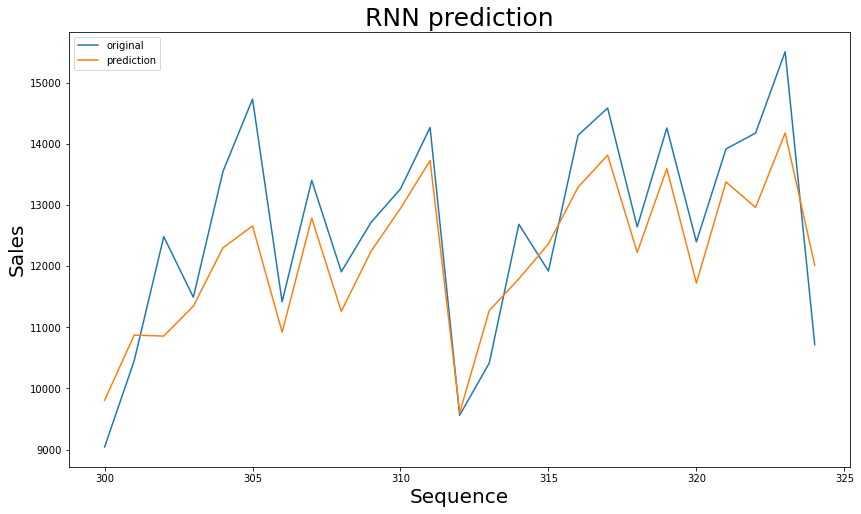

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('RNN prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 23ms/step - loss: 0.0423 - mae: 0.1768


[0.042297448962926865, 0.17683616280555725]